In [ ]:
!wget https://data.montgomerycountymd.gov/api/views/icn6-v9z3/rows.csv &> /dev/null

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
df = pd.read_csv("rows.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df1 = df.copy()

In [ ]:
df1['Dispatch Date / Time'] = pd.to_datetime(df1['Dispatch Date / Time']).dt.date

In [ ]:
df1.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201282497,2204,200013249,2020-03-19,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816.0,MCPD,Residence - Garage,E,2E1,4,5000.0,NaN,BROOKDALE,NaN,RD,03/18/2020 09:00:00 PM,03/19/2020 05:00:00 AM,38.955880,-77.094100,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,2020-03-19,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872.0,MCPD,Residence -Townhouse/Duplex,M,5M2,615,25600.0,NaN,COLTRANE,NaN,DR,03/19/2020 01:00:00 PM,03/19/2020 01:30:00 PM,39.277402,-77.211546,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,2020-08-19,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Retail - Other,M,5M1,701,20900.0,NaN,FREDERICK,NaN,RD,08/19/2020 06:30:00 PM,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,2018-11-02,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860.0,MCPD,Church/Synagogue/Temple,J,4J1,643,1300.0,NaN,OLNEY SANDY SPRING,NaN,RD,11/02/2018 03:34:00 PM,NaN,39.148691,-77.032251,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaT,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878.0,MCPD,Government Building,B,1B2,725,100.0,NaN,EDISON PARK,NaN,DR,11/02/2018 12:00:00 AM,NaN,39.111781,-77.235281,1D,"(39.1118, -77.2353)"


In [ ]:
df1 = df1.groupby(['Dispatch Date / Time','Crime Name1'])

In [ ]:
df1.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201282497,2204,200013249,2020-03-19,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816.0,MCPD,Residence - Garage,E,2E1,4,5000.0,NaN,BROOKDALE,NaN,RD,03/18/2020 09:00:00 PM,03/19/2020 05:00:00 AM,38.955880,-77.094100,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,2020-03-19,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872.0,MCPD,Residence -Townhouse/Duplex,M,5M2,615,25600.0,NaN,COLTRANE,NaN,DR,03/19/2020 01:00:00 PM,03/19/2020 01:30:00 PM,39.277402,-77.211546,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,2020-08-19,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Retail - Other,M,5M1,701,20900.0,NaN,FREDERICK,NaN,RD,08/19/2020 06:30:00 PM,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,2018-11-02,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860.0,MCPD,Church/Synagogue/Temple,J,4J1,643,1300.0,NaN,OLNEY SANDY SPRING,NaN,RD,11/02/2018 03:34:00 PM,NaN,39.148691,-77.032251,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaT,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878.0,MCPD,Government Building,B,1B2,725,100.0,NaN,EDISON PARK,NaN,DR,11/02/2018 12:00:00 AM,NaN,39.111781,-77.235281,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245060,201326703,9062,210013234,2021-04-09,90Z,1,Crime Against Society,All Other Offenses,FUGITIVE FROM JUSTICE (OUT OF STATE),ROCKVILLE,12200 BLK ROCKVILLE PIK,ROCKVILLE,MD,20852.0,MCPD,Parking Lot - Commercial,A,1A1,270,12200.0,NaN,ROCKVILLE,NaN,PIK,04/09/2021 08:30:00 AM,04/09/2021 11:00:00 AM,39.055046,-77.118228,1D,"(39.055, -77.1182)"
245061,201326769,9113,210013328,2021-04-09,90Z,1,Other,All Other Offenses,MENTAL ILLNESS - EMERGENCY PETITION,MONTGOMERY VILLAGE,8800 BLK CROSS COUNTRY PL,GAITHERSBURG,MD,20879.0,MCPD,Residence -Townhouse/Duplex,R,6R3,420,8800.0,NaN,CROSS COUNTRY,NaN,PL,04/09/2021 09:04:00 PM,04/09/2021 10:00:00 PM,39.163357,-77.181057,6D,"(39.1634, -77.1811)"
245064,201326663,9021,210013193,2021-04-08,90I,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,GERMANTOWN,19600 BLK CRYSTAL ROCK DR,GERMANTOWN,MD,20874.0,MCPD,Residence - Apartment/Condo,N,5N1,595,19600.0,NaN,CRYSTAL ROCK,NaN,DR,04/08/2021 08:22:00 PM,NaN,39.178529,-77.263096,5D,"(39.1785, -77.2631)"
245066,201326737,9199,210013276,2021-04-09,90Z,1,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,1000 BLK HOUSTON AVE,TAKOMA PARK,MD,20912.0,MCPD,Residence - Apartment/Condo,H,3H1,129,1000.0,NaN,HOUSTON,NaN,AVE,04/09/2021 02:35:00 PM,04/09/2021 03:40:00 PM,38.991544,-76.999627,3D,"(38.9915, -76.9996)"


In [ ]:
df2 = df.copy()
df2['Dispatch Date / Time'] = pd.to_datetime(df2['Dispatch Date / Time']).dt.date

In [ ]:
df2 = df2.groupby('Dispatch Date / Time').count()['Crime Name1'].to_frame()

In [ ]:
df2

,Crime Name1
Dispatch Date / Time,
2017-04-02,89
2017-04-03,114
2017-04-04,138
2017-04-05,137
2017-04-06,149
...,...
2021-04-05,96
2021-04-06,113
2021-04-07,124


In [ ]:
df2.reset_index(inplace=True)
df2.columns = ['ds','y']
df2.head()

,ds,y
0,2017-04-02,89
1,2017-04-03,114
2,2017-04-04,138
3,2017-04-05,137
4,2017-04-06,149


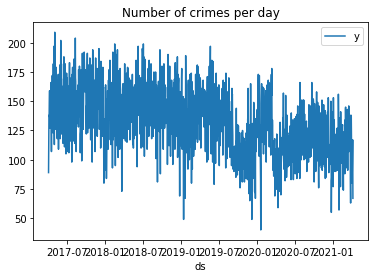

In [ ]:
df2.plot(x='ds', title='Number of crimes per day')
plt.show()

In [ ]:
df2['y'] = np.log(df2['y'])

In [ ]:
m1_plain = Prophet()
m1_plain.fit(df2)

NameError: ignored

In [ ]:
future = m1_plain.make_future_dataframe(periods=365)
forecast_m1 = m1_plain.predict(future)

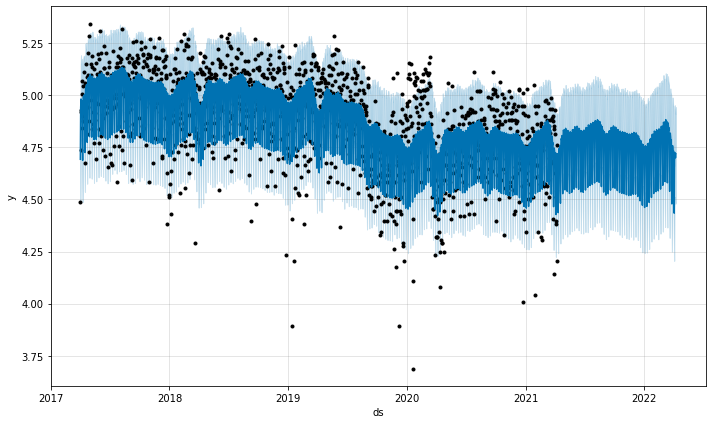

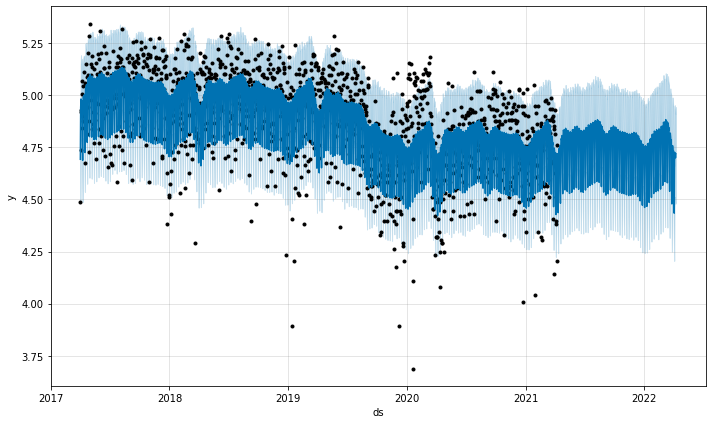

In [ ]:
m1_plain.plot(forecast_m1)

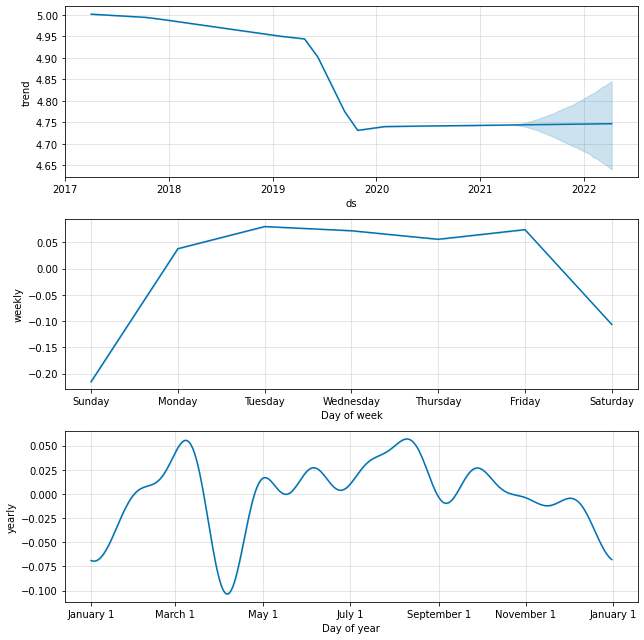

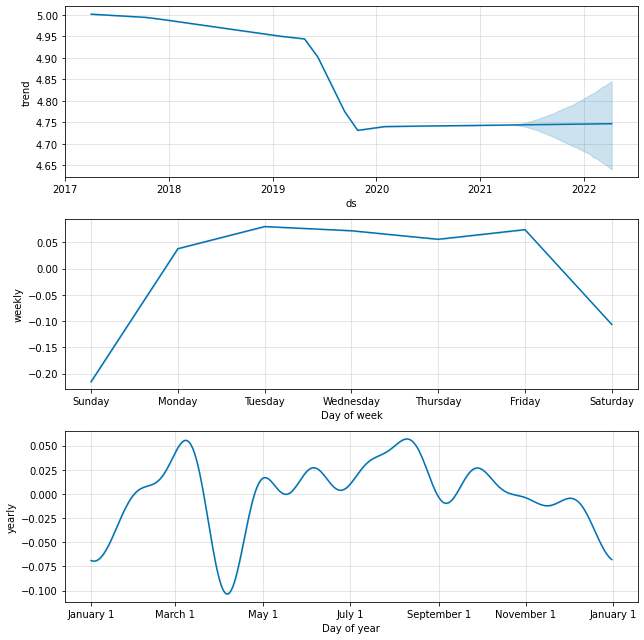

In [ ]:
m1_plain.plot_components(forecast_m1)

In [ ]:
y = df2['y'].to_frame()
y.index = df2['ds']
n = np.int(y.count())

In [ ]:
print(y['y'])

ds
2017-04-02    4.488636
2017-04-03    4.736198
2017-04-04    4.927254
2017-04-05    4.919981
2017-04-06    5.003946
                ...   
2021-04-04    4.382027
2021-04-05    4.510860
2021-04-06    4.682131
2021-04-07    4.762174
2021-04-08    4.204693
Name: y, Length: 1468, dtype: float64


In [ ]:
print(n)

1468


In [ ]:
forecast_m1_exp = np.exp(forecast_m1[['yhat','yhat_lower','yhat_upper']])
forecast_m1_exp.index = forecast_m1['ds']
forecast_m1_exp

,yhat,yhat_lower,yhat_upper
ds,,,
2017-04-02,109.080457,89.576087,134.351118
2017-04-03,140.003970,114.758047,170.611614
2017-04-04,145.632346,119.947433,179.548035
2017-04-05,144.222994,118.686080,172.066465
2017-04-06,141.790525,115.653390,174.374916
...,...,...,...
2022-04-04,108.215844,86.152544,137.928392
2022-04-05,112.657446,91.049741,141.319647
2022-04-06,111.659096,88.282160,138.787835


In [ ]:
error = forecast_m1_exp['yhat'] - y['y']
MAPE_m1 = (error/y['y']).abs().sum()/n *100
round(MAPE_m1,2)

2608.74